In [1]:
import pandas as pd
combined_data = pd.read_csv('combined_data.csv')

In [2]:
combined_data.head()

,DayOfWeek,Origin,Dest,DepTime,CRSArrTime,ArrTime,CRSDepTime,Cancelled,Departure_HourlyDewPointTemperature,Departure_HourlyDryBulbTemperature,...,Airline_AS,Airline_B6,Airline_DL,Airline_F9,Airline_G4,Airline_HA,Airline_NK,Airline_UA,Airline_WN,delay_time
0,4,BDL,RDU,2018-11-15 06:00:00,2018-11-15 07:50:00,2018-11-15 08:00:00,2018-11-15 06:00:00,0,-11.1,-5.6,...,False,False,True,False,False,False,False,False,False,-10.0
1,5,BDL,RDU,2018-11-16 06:31:00,2018-11-16 07:50:00,2018-11-16 08:59:00,2018-11-16 06:00:00,0,0.0,0.6,...,False,False,True,False,False,False,False,False,False,-69.0
2,2,BDL,RDU,2018-11-20 05:58:00,2018-11-20 07:50:00,2018-11-20 07:50:00,2018-11-20 06:00:00,0,1.1,1.7,...,False,False,True,False,False,False,False,False,False,0.0
3,6,BDL,RDU,2018-11-24 05:58:00,2018-11-24 07:50:00,2018-11-24 07:50:00,2018-11-24 06:00:00,0,-13.3,-6.1,...,False,False,True,False,False,False,False,False,False,0.0
4,1,BDL,RDU,2018-11-26 05:56:00,2018-11-26 07:50:00,2018-11-26 07:53:00,2018-11-26 06:00:00,0,2.2,2.2,...,False,False,True,False,False,False,False,False,False,-3.0


In [3]:
# romove useless columns
columns_to_drop = ['Origin','Dest','CRSDepTime','CRSArrTime','ArrTime','DepTime','DepTime_num','CRSArrTime_num','ArrTime_num','CRSDepTime_num','CRSDepTime_Dest_num','Departure_HourlyStationPressure','Arrival_HourlyStationPressure']
#columns_to_drop = ['Origin','Dest']
combined_data = combined_data.drop(columns=columns_to_drop)

In [4]:
combined_data.head()

,DayOfWeek,Cancelled,Departure_HourlyDewPointTemperature,Departure_HourlyDryBulbTemperature,Departure_HourlyPrecipitation,Departure_HourlyRelativeHumidity,Departure_HourlySeaLevelPressure,Departure_HourlyVisibility,Departure_HourlyWetBulbTemperature,Departure_HourlyWindDirection,...,Airline_AS,Airline_B6,Airline_DL,Airline_F9,Airline_G4,Airline_HA,Airline_NK,Airline_UA,Airline_WN,delay_time
0,4,0,-11.1,-5.6,0.0,66.0,1036.3,16.093,-7.1,10.0,...,False,False,True,False,False,False,False,False,False,-10.0
1,5,0,0.0,0.6,0.8,96.0,1001.6,3.219,0.3,10.0,...,False,False,True,False,False,False,False,False,False,-69.0
2,2,0,1.1,1.7,0.8,96.0,1012.7,8.047,1.4,350.0,...,False,False,True,False,False,False,False,False,False,0.0
3,6,0,-13.3,-6.1,0.0,57.0,1024.4,16.093,-8.0,180.0,...,False,False,True,False,False,False,False,False,False,0.0
4,1,0,2.2,2.2,0.0,100.0,1013.6,16.093,2.2,20.0,...,False,False,True,False,False,False,False,False,False,-3.0


In [5]:
#cancelled_data = combined_data[combined_data['Cancelled'] == 1]
delay_data = combined_data[combined_data['Cancelled'] == 0]

## delay predict

In [7]:
delay_data=delay_data.dropna()
delay_data = delay_data.drop(columns='Cancelled')

In [28]:
delay_data.columns

Index(['DayOfWeek', 'Departure_HourlyDewPointTemperature',
       'Departure_HourlyDryBulbTemperature', 'Departure_HourlyPrecipitation',
       'Departure_HourlyRelativeHumidity', 'Departure_HourlySeaLevelPressure',
       'Departure_HourlyVisibility', 'Departure_HourlyWetBulbTemperature',
       'Departure_HourlyWindDirection', 'Departure_HourlyWindSpeed',
       'Arrival_HourlyDewPointTemperature', 'Arrival_HourlyDryBulbTemperature',
       'Arrival_HourlyPrecipitation', 'Arrival_HourlyRelativeHumidity',
       'Arrival_HourlySeaLevelPressure', 'Arrival_HourlyVisibility',
       'Arrival_HourlyWetBulbTemperature', 'Arrival_HourlyWindDirection',
       'Arrival_HourlyWindSpeed', 'Dep_10', 'Dep_BKN', 'Dep_CLR', 'Dep_FEW',
       'Dep_OVC', 'Dep_SCT', 'Dep_VV', 'Arr_10', 'Arr_BKN', 'Arr_CLR',
       'Arr_FEW', 'Arr_OVC', 'Arr_SCT', 'Arr_VV', 'Year',
       'ArrTimeOfDay_afternoon', 'ArrTimeOfDay_evening',
       'ArrTimeOfDay_morning', 'ArrTimeOfDay_night', 'DepTimeOfDay_afternoon',
   

### rondom forest

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = delay_data.drop(columns=['delay_time'])
y = delay_data['delay_time']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [10]:

tree_model = DecisionTreeRegressor(random_state=42,max_depth=20,min_samples_leaf = 20,min_samples_split=50)

tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 27120.734660492624
R² Score: 0.024211659532941576


In [11]:
from tqdm import tqdm
from sklearn.ensemble import RandomForestRegressor
selector_model = RandomForestRegressor(n_estimators=100, random_state=42, min_samples_leaf=20, max_depth = 30, min_samples_split = 100, n_jobs = -1,verbose = 2)
selector_model.fit(X_train, y_train)

y_pred = selector_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 10.0min


building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 28.8min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.1s


Mean Squared Error: 25403.161214650027
R² Score: 0.08600895829087252


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    7.8s finished


In [12]:
feature_importances = selector_model.feature_importances_

# 创建一个数据框显示特征名称和对应的重要性分数
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# 按重要性排序
importance_df = importance_df.sort_values(by="Importance", ascending=False)


In [13]:
importance_df.head

<bound method NDFrame.head of                                 Feature  Importance
37                   ArrTimeOfDay_night    0.139795
43                           Dest_Label    0.064312
5      Departure_HourlySeaLevelPressure    0.060526
14       Arrival_HourlySeaLevelPressure    0.057309
42                         Origin_Label    0.046419
7    Departure_HourlyWetBulbTemperature    0.045767
4      Departure_HourlyRelativeHumidity    0.041800
13       Arrival_HourlyRelativeHumidity    0.039713
8         Departure_HourlyWindDirection    0.039111
16     Arrival_HourlyWetBulbTemperature    0.038976
9             Departure_HourlyWindSpeed    0.036603
17          Arrival_HourlyWindDirection    0.034508
2    Departure_HourlyDryBulbTemperature    0.032908
6            Departure_HourlyVisibility    0.029407
10    Arrival_HourlyDewPointTemperature    0.029090
11     Arrival_HourlyDryBulbTemperature    0.028724
18              Arrival_HourlyWindSpeed    0.027690
1   Departure_HourlyDewPointTemper

# Cancel data

In [6]:
combined_data.isna().sum()

DayOfWeek                                   0
Cancelled                                   0
Departure_HourlyDewPointTemperature         0
Departure_HourlyDryBulbTemperature          0
Departure_HourlyPrecipitation               0
Departure_HourlyRelativeHumidity            0
Departure_HourlySeaLevelPressure            0
Departure_HourlyVisibility                  0
Departure_HourlyWetBulbTemperature          0
Departure_HourlyWindDirection               0
Departure_HourlyWindSpeed                   0
Arrival_HourlyDewPointTemperature           0
Arrival_HourlyDryBulbTemperature            0
Arrival_HourlyPrecipitation                 0
Arrival_HourlyRelativeHumidity              0
Arrival_HourlySeaLevelPressure              0
Arrival_HourlyVisibility                    0
Arrival_HourlyWetBulbTemperature            0
Arrival_HourlyWindDirection                 0
Arrival_HourlyWindSpeed                     0
Dep_10                                      0
Dep_BKN                           

In [7]:
combined_data = combined_data.drop(columns=['delay_time'])

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
X = combined_data.drop('Cancelled', axis=1)  # 假设 'Cancelled' 列是标签
y = combined_data['Cancelled']

# 将数据分割成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 决策树模型
dt_classifier = DecisionTreeClassifier(random_state=42,max_depth=20,min_samples_leaf = 20,min_samples_split=50,class_weight = 'balanced')
dt_classifier.fit(X_train, y_train)

# 预测并评估决策树模型
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Model Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Model Accuracy: 0.8613193387488532
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.87      0.92   1395822
           1       0.08      0.65      0.15     26633

    accuracy                           0.86   1422455
   macro avg       0.54      0.76      0.54   1422455
weighted avg       0.98      0.86      0.91   1422455



In [9]:

# 随机森林模型
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, min_samples_leaf=20, max_depth = 30, min_samples_split = 100, n_jobs = -1,verbose = 2,class_weight = 'balanced')
rf_classifier.fit(X_train, y_train)

# 预测并评估随机森林模型
y_pred_rf = rf_classifier.predict(X_test)
print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100building tree 15 of 100

building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.3min


building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.2min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    5.8s finished


Random Forest Model Accuracy: 0.9566910728283144
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98   1395822
           1       0.23      0.55      0.32     26633

    accuracy                           0.96   1422455
   macro avg       0.61      0.76      0.65   1422455
weighted avg       0.98      0.96      0.97   1422455



In [10]:
cancel_probabilities = rf_classifier.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    6.4s finished


In [11]:
cancel_probabilities

array([0.37809376, 0.02570192, 0.09200074, ..., 0.18641251, 0.21866933,
       0.07956121])

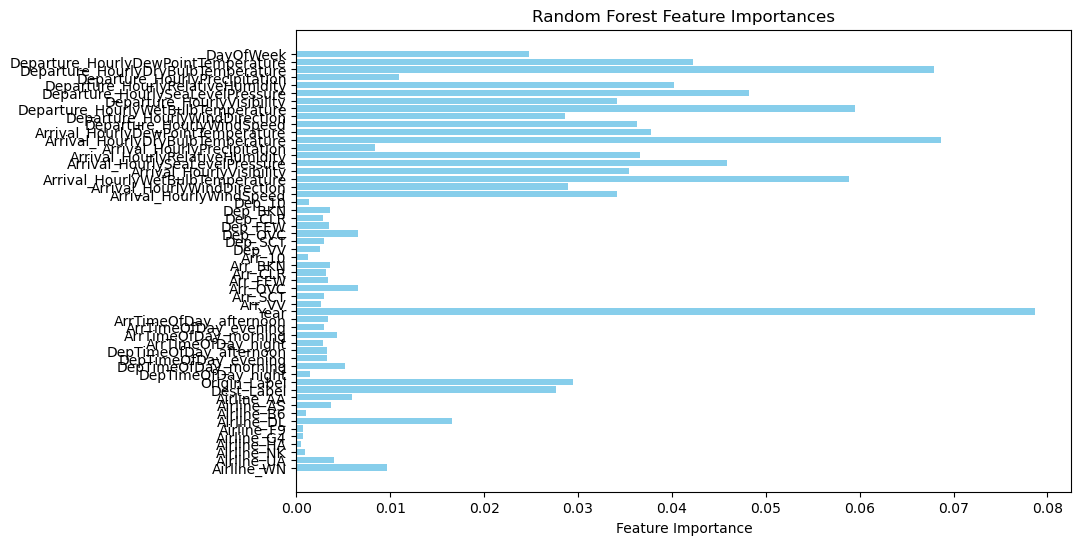

In [49]:
importances = rf_classifier.feature_importances_
features = X_test.columns  # 假设 X_test 是特征数据集

plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()  # 将重要特征排在最上方
plt.show()

In [12]:
feature_importances = rf_classifier.feature_importances_

# 创建一个数据框显示特征名称和对应的重要性分数
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# 按重要性排序
importance_df = importance_df.sort_values(by="Importance", ascending=False)


In [13]:
importance_df

,Feature,Importance
33,Year,0.078628
11,Arrival_HourlyDryBulbTemperature,0.068618
2,Departure_HourlyDryBulbTemperature,0.067941
7,Departure_HourlyWetBulbTemperature,0.059474
16,Arrival_HourlyWetBulbTemperature,0.058808
5,Departure_HourlySeaLevelPressure,0.048247
14,Arrival_HourlySeaLevelPressure,0.045883
1,Departure_HourlyDewPointTemperature,0.042204
4,Departure_HourlyRelativeHumidity,0.040230
10,Arrival_HourlyDewPointTemperature,0.037799


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# 训练模型
log_reg.fit(X_train, y_train)

/Users/yanmeiyi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [47]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

print("sklearn Coefficients:", log_reg.coef_)

# 使用 statsmodels 拟合相同模型以获得显著性水平
# 添加常数项
X_train_sm = sm.add_constant(X_train)

# 使用 statsmodels 的 Logit 模型
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# 显示回归结果
print(result.summary())


sklearn Coefficients: [[ 4.42417020e-03  3.49854985e-02 -6.32552356e-02  5.10914660e-02
   9.61879057e-04 -2.15721350e-02 -6.64171547e-02 -2.06491098e-02
  -2.51065133e-04  1.31361526e-01  1.12286230e-02 -6.38444033e-02
   4.15723071e-02  9.71316108e-04 -9.33846435e-03 -7.17278620e-02
   1.00477003e-02 -4.65554125e-04  1.33779383e-01 -1.28413981e-02
  -5.31502685e-02 -1.62759427e-02  5.15403065e-02 -9.88607124e-02
   3.09392116e-02  1.04077800e-01 -9.79615252e-03 -4.50054292e-02
  -3.98901755e-02  3.53422445e-02 -7.75870091e-02  2.45577440e-02
   1.01644403e-01  1.44182185e-02 -8.51389369e-02  8.76943037e-02
  -1.51068745e-01  1.47956604e-01 -4.83439535e-03  1.24487069e-01
  -1.98398869e-01  7.81894216e-02  3.24402496e-04  3.13748639e-04
   9.91670157e-04  8.84921860e-03  2.19289183e-02 -5.96766054e-01
   7.25623554e-03  3.79812332e-02  3.20046554e-02  3.83019264e-02
   1.26859141e-02  4.36209509e-01]]


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [48]:
# 保存 X_train 和 X_test 到 CSV 文件
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)

# 如果 y_train 和 y_test 也需要保存
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)
